In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
df = pd.read_csv(os.path.join(os.getcwd(), "data", "basis_supervise.csv")).dropna()

In [3]:
def multi_max(row):
    return max(row["future_2_cost"], row["future_3_cost"], row["future_4_cost"])

In [4]:
df["max_basis_return"] = df.apply(multi_max, axis=1)

In [5]:
df["date"] = df["date"].apply(lambda x: x.split()[0])
df.head()

,id,date,va_type,spot_price,future_1_id,future_2_id,future_3_id,future_4_id,future_1_price,future_2_price,...,future_4_price,future_1_basis,future_2_basis,future_3_basis,future_4_basis,future_1_cost,future_2_cost,future_3_cost,future_4_cost,max_basis_return
0,1,2021-09-14,IC,7556.6157,IC2109,IC2110,IC2112,IC2203,7545.2,7478.2,...,7135.6,11.4157,78.4157,236.6157,421.0157,0.183801,0.122182,0.121585,0.109924,0.122182
1,2,2021-09-14,IF,4917.1617,IF2109,IF2110,IF2112,IF2203,4917.2,4898.0,...,4818.4,-0.0383,19.1617,61.1617,98.7617,-0.000948,0.045883,0.048298,0.039627,0.048298
2,3,2021-09-14,IH,3188.2607,IH2109,IH2110,IH2112,IH2203,3189.0,3189.6,...,3168.8,-0.7393,-1.3393,8.6607,19.4607,-0.028212,-0.004946,0.010548,0.012043,0.012043
3,4,2021-09-15,IC,7592.3059,IC2109,IC2110,IC2112,IC2203,7571.8,7517.0,...,7160.2,20.5059,75.3059,229.9059,432.1059,0.492910,0.120678,0.118846,0.112899,0.120678
4,5,2021-09-15,IF,4867.3187,IF2109,IF2110,IF2112,IF2203,4869.8,4852.2,...,4778.6,-2.4813,15.1187,56.3187,88.7187,-0.093036,0.037792,0.045412,0.036158,0.045412


In [6]:
groups = df.groupby("va_type")

In [7]:
ts = []
for name, group in groups:
    result = group.set_index("date")["max_basis_return"]
    result.name = name
    ts.append(result)
aaa = pd.concat(ts, axis=1)

<Axes: xlabel='date'>

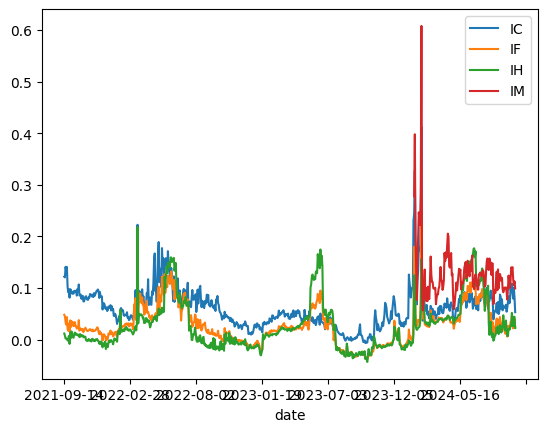

In [8]:
aaa.plot()

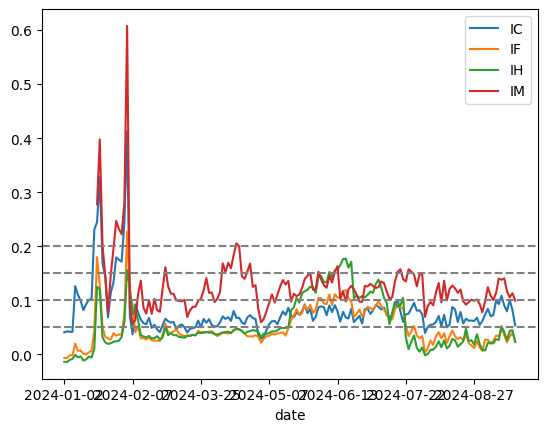

In [16]:
ax = aaa[aaa.index>='2024-01-01'].plot()
ys = [0.05, 0.1, 0.15, 0.2]
for y in ys:
    ax.axhline(y=y, color='gray', linestyle='--')